In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, RobustScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, validation_curve

In [2]:
df = pd.read_csv('Clean_House_Data.csv')
# df

In [3]:
# print(df.columns, len(df.columns))
df.dropna(axis=1, inplace=True)
# print(df.columns, len(df.columns))


In [4]:
# df.dtypes

In [5]:
X = df.loc[:, df.columns != 'price'].to_numpy()
y = df['price'].to_numpy()

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4444, test_size=0.20)

In [7]:
X_train, y_train, X_test, y_test

(array([[0.50044484, 0.1       , 0.5       , ..., 1.        , 0.        ,
         0.        ],
        [0.81183274, 0.2       , 0.5       , ..., 1.        , 0.        ,
         0.        ],
        [0.55616103, 0.        , 0.33333333, ..., 1.        , 0.        ,
         0.        ],
        ...,
        [0.0055605 , 0.2       , 0.33333333, ..., 1.        , 0.        ,
         0.        ],
        [0.74510676, 0.        , 0.33333333, ..., 1.        , 0.        ,
         0.        ],
        [0.82072954, 0.        , 0.5       , ..., 1.        , 0.        ,
         0.        ]]),
 array([ 220000., 1049000.,  100000., ...,  350000.,  245000.,  279000.]),
 array([[0.56283363, 0.5       , 0.66666667, ..., 1.        , 0.        ,
         0.        ],
        [0.02224199, 0.5       , 0.66666667, ..., 0.        , 1.        ,
         0.        ],
        [0.66859431, 0.1       , 0.66666667, ..., 1.        , 0.        ,
         0.        ],
        ...,
        [0.10342527, 0.9       , 

In [22]:
degree_range = np.arange(1,4)

In [23]:
pipe = make_pipeline(PolynomialFeatures(), RobustScaler(),LinearRegression())
k = 5
train_scores, valid_scores = validation_curve(pipe,
                                              X_train, y_train,
                                              param_name='polynomialfeatures__degree',
                                              param_range=degree_range,
                                              cv=k)

In [24]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

Text(0.5, 1.0, 'Validation Curve with Polynomial Regression\n5-fold Cross-Validation')

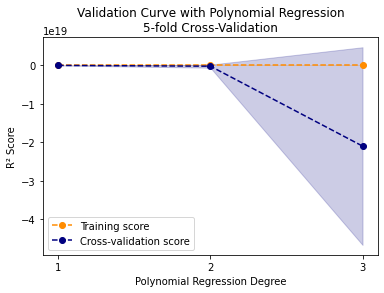

In [25]:
plt.plot(degree_range, train_scores_mean, color="darkorange",   marker='o', linestyle='--', label= 'Training score')
plt.fill_between(degree_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange")
plt.plot(degree_range, valid_scores_mean, color="navy",   marker='o', linestyle='--', label='Cross-validation score')
plt.fill_between(degree_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy")
plt.xticks(degree_range)
plt.xlabel('Polynomial Regression Degree')
plt.ylabel('R² Score')
plt.legend(loc='best')
plt.title(f'Validation Curve with Polynomial Regression\n{k}-fold Cross-Validation')

In [26]:
train_scores_mean, valid_scores_mean

(array([0.63299348, 0.73667749, 0.78413823]),
 array([ 6.30129956e-01, -1.96828386e+17, -2.09494593e+19]))

In [27]:
for degree in degree_range:
    poly_reg = make_pipeline(PolynomialFeatures(degree), RobustScaler(), LinearRegression())
    poly_reg.fit(X_train, y_train)
    score_train = poly_reg.score(X_train, y_train)
    score_test = poly_reg.score(X_test, y_test)
    print(f'Polynomial of degree {degree}\n\ttrain score:\t{score_train}\n\ttest score:\t{score_test}')
    

Polynomial of degree 1
	train score:	0.6327392904430337
	test score:	0.627269702998013
Polynomial of degree 2
	train score:	0.7337184006946347
	test score:	0.7026506503552263
Polynomial of degree 3
	train score:	0.7995185705186248
	test score:	-3.14098995582336e+19


In [86]:
np.random.seed(4444)

sgd_reg = SGDRegressor()
sgd_reg.fit(X_train, y_train)
score_train = sgd_reg.score(X_train, y_train)
score_test = sgd_reg.score(X_test, y_test)
print(f'train score:\t{score_train}\ntest score:\t{score_test}')

train score:	0.6280597310565308
test score:	0.6229597191936297


In [87]:
sgd_reg.get_params()

{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_loss',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [93]:
np.random.seed(4444)

sgd_reg = SGDRegressor(max_iter=1000)
sgd_reg.fit(X_train, y_train)
score_train = sgd_reg.score(X_train, y_train)
score_test = sgd_reg.score(X_test, y_test)
print(f'train score:\t{score_train}\ntest score:\t{score_test}')

train score:	0.6280597310565308
test score:	0.6229597191936297


In [14]:
from sklearn.model_selection import learning_curve

In [118]:
lin_reg = LinearRegression()

In [139]:
k = 3
train_sizes_abs, train_scores, test_scores = \
    learning_curve(lin_reg, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=k)
train_sizes_abs, train_scores, test_scores
# train_sizes_abs, train_scores, test_scores = \
#     learning_curve(lin_reg, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=k)
# train_sizes_abs, train_scores, test_scores

(array([ 536, 1072, 1608, 2144, 2680, 3216, 3752, 4288, 4824, 5361]),
 array([[0.63989197, 0.66949117, 0.66949117],
        [0.61812832, 0.65968591, 0.65968591],
        [0.63195884, 0.63999485, 0.63999485],
        [0.62657798, 0.63954708, 0.63954708],
        [0.62949641, 0.64246823, 0.64246823],
        [0.62607805, 0.63720011, 0.64000431],
        [0.63095604, 0.64025027, 0.63353636],
        [0.63475473, 0.64317234, 0.6357201 ],
        [0.63097133, 0.63853287, 0.63263067],
        [0.62978738, 0.63668377, 0.63362667]]),
 array([[0.62019287, 0.6096954 , 0.61680986],
        [0.63131138, 0.61812338, 0.62623856],
        [0.63017381, 0.62025722, 0.62679281],
        [0.63177088, 0.62057805, 0.62694096],
        [0.63364814, 0.62021413, 0.62818714],
        [0.63479816, 0.62088254, 0.62822201],
        [0.63508206, 0.62158516, 0.62855849],
        [0.63613095, 0.62113207, 0.62852394],
        [0.63650156, 0.62147724, 0.62900942],
        [0.6370729 , 0.62167225, 0.62839037]]))

In [140]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std

(array([0.65962477, 0.64583338, 0.63731618, 0.63522405, 0.63814429,
        0.63442749, 0.63491422, 0.63788239, 0.63404496, 0.63336594]),
 array([0.0139532 , 0.01959043, 0.00378821, 0.00611369, 0.00611497,
        0.00601391, 0.00391744, 0.00376126, 0.00324493, 0.00282147]),
 array([0.61556604, 0.62522444, 0.62574128, 0.62642996, 0.6273498 ,
        0.62796757, 0.62840857, 0.62859565, 0.62899608, 0.62904517]),
 array([0.00437489, 0.00543152, 0.00411615, 0.00458372, 0.00551628,
        0.00568388, 0.00551111, 0.00612347, 0.00613366, 0.00630432]))

Text(0.5, 1.0, 'Learning Curves\n3-fold Cross-Validation')

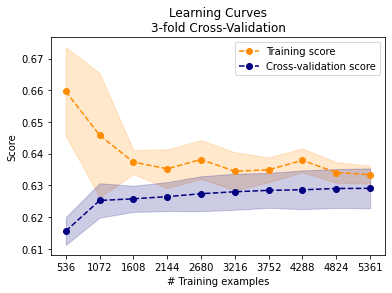

In [141]:
plt.plot(train_sizes_abs, train_scores_mean, color="darkorange",   marker='o', linestyle='--', label= 'Training score')
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange")
plt.plot(train_sizes_abs, test_scores_mean, color="navy",   marker='o', linestyle='--', label='Cross-validation score')
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy")
plt.xticks(train_sizes_abs)
plt.xlabel('# Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.title(f'Learning Curves\n{k}-fold Cross-Validation')